Stereograph Cards  

The purpose of this Jupyter notebook is to explore a library of Stereograph Cards from the Library of Congress, specifically analyzing data to gain insights into the historical fascination with 3D technologies. The initial code provided accomplishes the following tasks:  

Step 1: I downloaded and parsed the file manifest and metadata JSON files to create a structured dataset.

In [15]:
import io
import pandas as pd  # Importing pandas for data manipulation and analysis
import requests  # Importing requests to handle HTTP requests
from helpers import get_file_stats  # Importing a helper function to get file statistics
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

# Base URL of the stereographs data package from the Library of Congress
DATA_URL = 'https://data.labs.loc.gov/stereographs/'

# URL of the file manifest containing metadata about the stereographs collection
file_manifest_url = f'{DATA_URL}manifest.json'

# Sending a GET request to download the file manifest, with a timeout of 120 seconds
response = requests.get(file_manifest_url, timeout=120)

# Parsing the response JSON content into a Python dictionary
response_json = response.json()

# Creating a list of dictionaries by zipping the columns and rows from the JSON response
files = [dict(zip(response_json["cols"], row)) for row in response_json["rows"]]

# Using the helper function to calculate statistics about the files
stats = get_file_stats(files)

# Converting the statistics into a pandas DataFrame for better readability and manipulation
stats_df = pd.DataFrame(stats)

# Displaying the statistics DataFrame
stats_df

,FileType,Count,Size
0,.jpg,"39,597",4.03GB


In [16]:
# Constructing the URL to access the metadata JSON file
metadata_url = f'{DATA_URL}metadata.json'

# Sending a GET request to download the metadata file, with a timeout of 300 seconds
response = requests.get(metadata_url, timeout=300)

# Parsing the response JSON content into a Python dictionary
data = response.json()

# Printing the number of entries in the loaded metadata file, formatted with commas
print(f'Loaded metadata file with {len(data):,} entries.')

Loaded metadata file with 39,532 entries.


In [17]:
# Converting the metadata dictionary into a pandas DataFrame
df = pd.DataFrame(data)
df_reset = df.reset_index()

# Printing the column names of the DataFrame, joined into a single string separated by commas
print(', '.join(df.columns.to_list()))

access_restricted, aka, campaigns, contributor, coordinates, date, description, digitized, extract_timestamp, group, hassegments, id, image_url, index, language, latlong, location, location_str, locations, lonlat, mime_type, online_format, original_format, other_title, partof, reproductions, resources, shelf_id, site, subject, timestamp, title, unrestricted, url, item, related, dates, number, number_former_id, number_lccn, number_oclc, number_carrier_type, number_source_modified, type, location_city, location_country, location_state, location_county, manifest_id


In [18]:
# List of columns to select from the DataFrame
select = ["manifest_id","url", "image_url", "subject", "title", "other_title", "description", "date", "location", "coordinates", "latlong", "contributor"]
root = df[select]
root.set_index("url", inplace=True)
root.head(3)

,manifest_id,image_url,subject,title,other_title,description,date,location,coordinates,latlong,contributor
url,,,,,,,,,,,
https://www.loc.gov/item/2015651359/,2015651359_1s04563r,[https://tile.loc.gov/storage-services/service...,"[photographic prints, civil war, united states...",Institute Hall - known as Secession Hall,[],[1 photograph : print on card mount ; mount 17...,1860,"[south carolina, charleston, united states]","[32.88856,-80.00751]","[32.88856, -80.00751]",[osborn & durbec]
https://www.loc.gov/item/2019644457/,2019644457_1s24718r,[https://tile.loc.gov/storage-services/service...,"[stereographs, photographic prints]","Unter den Linden, Berlin's best known street, ...",[],[1 photograph : print on card mount ; mount 9 ...,1920,,,,
https://www.loc.gov/item/2018652478/,2018652478_1s14860r,[https://tile.loc.gov/storage-services/service...,"[stereographs, photographic prints]","Seining Chenook Salmon, largest variety known,...",[],[1 photograph : print on card mount ; mount 9 ...,1902,,,,[underwood & underwood]


In [19]:
#filter usa which will be the main story of this analysis  

# List of all U.S. states
us_states = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 
    'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 
    'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 
    'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 
    'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 
    'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 
    'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 
    'wisconsin', 'wyoming', 'united', 'states'
]

root_copy = root.copy() 
# convert all location strings in the list to lowercase
def to_lower(location_list):
    if isinstance(location_list, list):
        return [loc.lower() for loc in location_list]
    return location_list

# Apply the function to convert all locations to lowercase
root_copy['location'] = root_copy['location'].apply(to_lower)

#  check if "united states" or any U.S. state is in the list
def contains_united_states_or_state(location_list):
    if isinstance(location_list, list):
        # Check for any U.S. state
        if any(state in loc for loc in location_list for state in us_states):
            return True
    return False

# Filter the DataFrame
usa = root_copy.loc[root_copy['location'].apply(contains_united_states_or_state)]
usa.head(3)

,manifest_id,image_url,subject,title,other_title,description,date,location,coordinates,latlong,contributor
url,,,,,,,,,,,
https://www.loc.gov/item/2015651359/,2015651359_1s04563r,[https://tile.loc.gov/storage-services/service...,"[photographic prints, civil war, united states...",Institute Hall - known as Secession Hall,[],[1 photograph : print on card mount ; mount 17...,1860,"[south carolina, charleston, united states]","[32.88856,-80.00751]","[32.88856, -80.00751]",[osborn & durbec]
https://www.loc.gov/item/2005686578/,2017656888_1s07303r,[https://tile.loc.gov/storage-services/service...,"[coney island (new york, n.y.), photographic p...",In Leoney Islands well known Bowery New York,[],[1 photograph : print on card mount ; mount 9 ...,1904,"[coney island, new york, bowery, street, luna ...",,,"[rau, william herman]"
https://www.loc.gov/item/2018652850/,2018652850_1s15352r,[https://tile.loc.gov/storage-services/service...,"[photographic prints, stereographs, rhode island]","Old Tower, relic of the Norsemen, America's ea...",[],[1 photograph : print on card mount ; mount 9 ...,1903,[rhode island],,,


In [20]:
# Extract the "location" column from the root DataFrame
stereo_locations = (
    usa[["location"]]
    # Explode the "location" column, so each list element becomes a row
    .explode("location")
    # Reset the DataFrame index to be sequential
    .reset_index()
    # Filter out rows where "location" is an empty string
    .loc[lambda df: df["location"] != ""] 
)

# Display the first 30 rows of the processed DataFrame
stereo_locations.head(3)

,url,location
0,https://www.loc.gov/item/2015651359/,south carolina
1,https://www.loc.gov/item/2015651359/,charleston
2,https://www.loc.gov/item/2015651359/,united states


In [21]:
# List of words to search for
words_to_search = ['united', 'states', 'united states']

# Create a regex pattern to match any of the words
pattern = '|'.join(words_to_search)

# Filter out rows containing any of the words
location_filtered = stereo_locations[~stereo_locations['location'].str.contains(pattern, case=False, na=False)]

location_filtered.head(3)

,url,location
0,https://www.loc.gov/item/2015651359/,south carolina
1,https://www.loc.gov/item/2015651359/,charleston
3,https://www.loc.gov/item/2005686578/,coney island


In [22]:
# Get value counts
location_counts = location_filtered["location"].value_counts()

# Convert the value counts to a DataFrame
location_counts_df = location_counts.reset_index()

# Rename the columns
location_counts_df.columns = ['location', 'count']

print(location_counts_df)

             location  count
0            new york   2638
1     washington d.c.   1083
2            missouri    895
3         saint louis    884
4        pennsylvania    794
...               ...    ...
998           phoebus      1
999     genesee river      1
1000     new rochelle      1
1001      long bridge      1
1002         the mall      1

[1003 rows x 2 columns]


In [23]:
# Extract the "subject" column from the root DataFrame
stereo_subject = (
    usa[["subject"]]
    # Explode the "location" column, so each list element becomes a row
    .explode("subject")
    # Reset the DataFrame index to be sequential
    .reset_index()
    # Filter out rows where "location" is an empty string
    .loc[lambda df: df["subject"] != ""] 
)

# Display the first rows of the processed DataFrame
stereo_subject.head(3) 

,url,subject
0,https://www.loc.gov/item/2015651359/,photographic prints
1,https://www.loc.gov/item/2015651359/,civil war
2,https://www.loc.gov/item/2015651359/,united states


In [24]:
# List of words to search for
words_to_search_subject = ['photographic prints', 'stereographs', 'united states']

# Create a regex pattern to match any of the words
pattern_2 = '|'.join(words_to_search_subject)

# Filter out rows containing any of the words
subject_filtered = stereo_subject[~stereo_subject['subject'].str.contains(pattern_2, case=False, na=False)]

subject_filtered.head(3)

,url,subject
1,https://www.loc.gov/item/2015651359/,civil war
3,https://www.loc.gov/item/2015651359/,south carolina
4,https://www.loc.gov/item/2015651359/,charleston


In [25]:
# Get value counts
subject_counts = subject_filtered["subject"].value_counts()
subject_counts.head(3)


subject
new york (state)    2366
albumen prints      1971
new york            1837
Name: count, dtype: int64

In [26]:
(
    subject_filtered
    .loc[lambda df: df["subject"] == "disaster victims"]
)

,url,subject
12306,https://www.loc.gov/item/89712130/,disaster victims
12326,https://www.loc.gov/item/89712137/,disaster victims
36383,https://www.loc.gov/item/2017652205/,disaster victims
46539,https://www.loc.gov/item/00650452/,disaster victims
50275,https://www.loc.gov/item/2004680419/,disaster victims
66976,https://www.loc.gov/item/98504817/,disaster victims


In [27]:
us = pd.DataFrame(data)
def clean_date(date):
    if isinstance(date, str) and '-' in date:
        return int(date.split('-')[0])  # Extract the year part and convert to integer
    return int(date)  # Convert the year part to integer
    
# Apply the cleaning function to the 'date' column
us['date'] = us['date'].apply(clean_date)
date_clean = us[['url', 'date']]
date_clean.head()

,url,date
0,https://www.loc.gov/item/2015651359/,1860
1,https://www.loc.gov/item/2019644457/,1920
2,https://www.loc.gov/item/2018652478/,1902
3,https://www.loc.gov/item/2005686578/,1904
4,https://www.loc.gov/item/00650998/,1902


In [28]:
# Merge location_filtered and subject_filtered on 'url'
combined_df = pd.merge(location_filtered, subject_filtered, on='url')

# Merge the combined DataFrame with date_clean on 'url'
final_df = pd.merge(combined_df, date_clean, on='url')

# Display the final DataFrame
final_df ["location"].nunique() 

1003

date
1843       2
1850      70
1857      14
1858      73
1859     250
        ... 
1923    1001
1924      80
1927       7
1928       8
1929      10
Name: count, Length: 73, dtype: int64


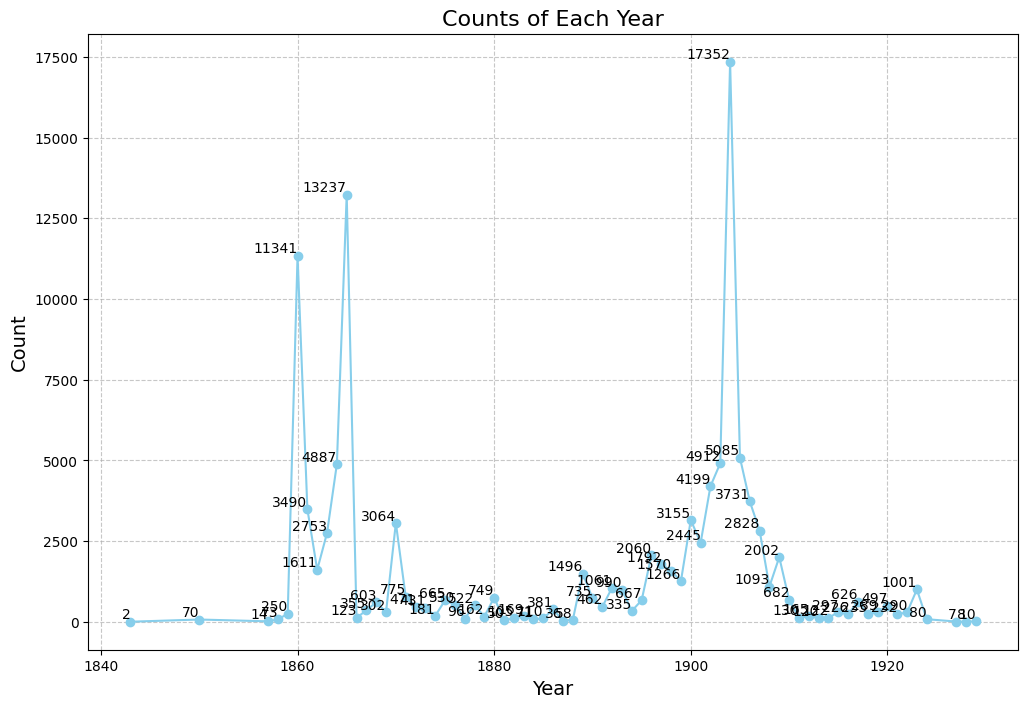

In [29]:
# Count occurrences of each year and sort by year
year_counts = final_df['date'].value_counts().sort_index()
print(year_counts)

# Plot the counts of each year
plt.figure(figsize=(12, 8))
year_counts.plot(kind='line', marker='o', color='skyblue')

# Adding grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Each Year', fontsize=16)

# Adding data labels to the points
for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y, f'{y}', ha='right', va='bottom', fontsize=10)

plt.show()

In [30]:
# Inspect the DataFrame after resetting the index
year_counts_df = year_counts.reset_index()
print(year_counts_df.head()) 
year_counts_df.to_csv('year_counts_v2.csv', index=False) 

   date  count
0  1843      2
1  1850     70
2  1857     14
3  1858     73
4  1859    250


In [31]:
year_counts.to_csv('years_v_1.csv', index=False)

In [32]:
final_df.to_csv('corrections.csv', index=False)

In [33]:
# List of US states in lowercase
us_states = [
    "alabama", "alaska", "arizona", "arkansas", "california", "colorado", 
    "connecticut", "delaware", "florida", "georgia", "hawaii", "idaho", 
    "illinois", "indiana", "iowa", "kansas", "kentucky", "louisiana", 
    "maine", "maryland", "massachusetts", "michigan", "minnesota", 
    "mississippi", "missouri", "montana", "nebraska", "nevada", 
    "new hampshire", "new jersey", "new mexico", "new york", "north carolina", 
    "north dakota", "ohio", "oklahoma", "oregon", "pennsylvania", 
    "rhode island", "south carolina", "south dakota", "tennessee", "texas", 
    "utah", "vermont", "virginia", "washington", "west virginia", "wisconsin", 
    "wyoming"
]

# Ensure the location column is in lowercase
final_df['location'] = final_df['location'].str.lower()

# Define a function to check exact match with states
def is_exact_state(location, states):
    return location in states

# Apply the function to filter the DataFrame
new_filtered_df = final_df[final_df['location'].apply(lambda x: is_exact_state(x, us_states))]

# Remove occurrences of "north", "south", "east", and "west"
new_filtered_df['location'] = final_df['location'].replace(r'\bnorth\b|\bsouth\b|\beast\b|\bwest\b', '', regex=True).str.strip()

# Display the value counts
new_state_counts = new_filtered_df['location'].value_counts()

new_state_counts.head() 

/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/1381054323.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df['location'] = final_df['location'].replace(r'\bnorth\b|\bsouth\b|\beast\b|\bwest\b', '', regex=True).str.strip()


location
new york        15631
missouri         6540
virginia         4964
carolina         4010
pennsylvania     3583
Name: count, dtype: int64

In [34]:
new_filtered_df 

,url,location,subject,date
0,https://www.loc.gov/item/2015651359/,carolina,civil war,1860
1,https://www.loc.gov/item/2015651359/,carolina,south carolina,1860
2,https://www.loc.gov/item/2015651359/,carolina,charleston,1860
3,https://www.loc.gov/item/2015651359/,carolina,history,1860
15,https://www.loc.gov/item/2005686578/,new york,"coney island (new york, n.y.)",1904
...,...,...,...,...
111971,https://www.loc.gov/item/2015647793/,carolina,history,1863
111976,https://www.loc.gov/item/2015647790/,carolina,civil war,1861
111977,https://www.loc.gov/item/2015647790/,carolina,south carolina,1861
111978,https://www.loc.gov/item/2015647790/,carolina,beaufort,1861


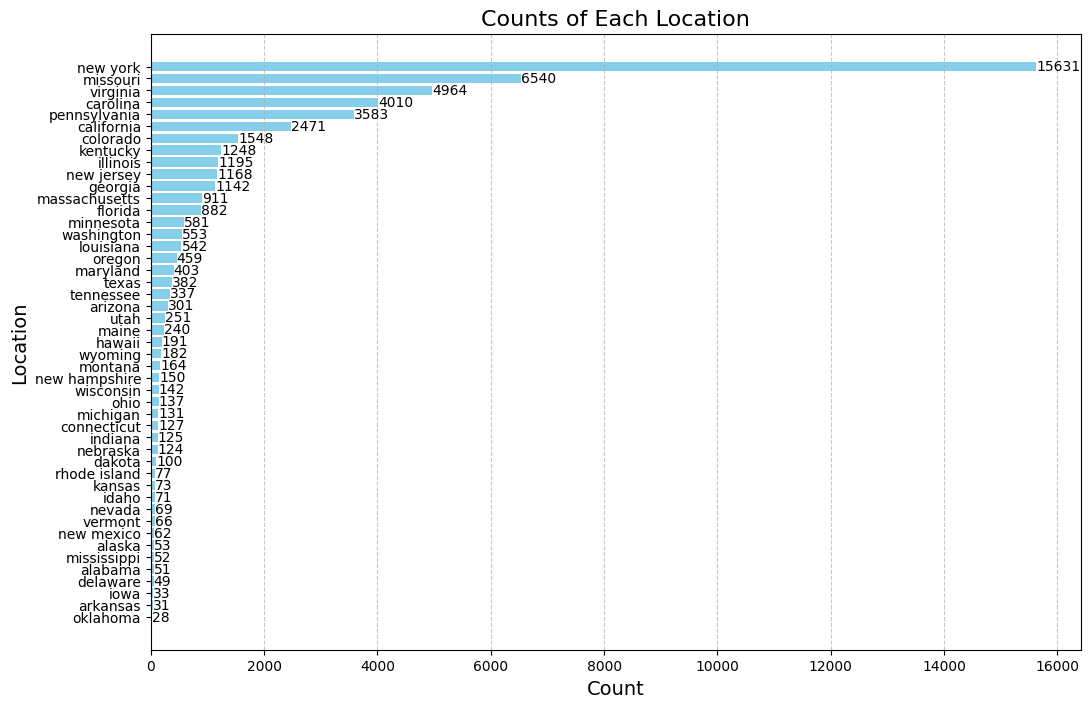

In [35]:
# Sort the counts in descending order
new_state_counts = new_state_counts.sort_values(ascending=True)

# Plot the counts of each location as a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(new_state_counts.index, new_state_counts.values, color='skyblue')

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', ha='left', fontsize=10)

plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.title('Counts of Each Location', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [50]:
# Convert the Series to a DataFrame
new_state_counts_df = new_state_counts.reset_index()

# Rename the columns for clarity
new_state_counts_df.columns = ['location', 'count']

# Save the DataFrame to a CSV file
new_state_counts_df.to_csv('new_state_counts.csv', index=False)

In [36]:
# List of states to replace
replace = [
    "alabama", "alaska", "arizona", "arkansas", "california", "colorado", 
    "connecticut", "delaware", "florida", "georgia", "hawaii", "idaho", 
    "illinois", "indiana", "iowa", "kansas", "kentucky", "louisiana", 
    "maine", "maryland", "massachusetts", "michigan", "minnesota", 
    "mississippi", "missouri", "montana", "nebraska", "nevada", 
    "new hampshire", "new jersey", "new mexico", "new york", "north carolina", 
    "north dakota", "ohio", "oklahoma", "oregon", "pennsylvania", 
    "rhode island", "south carolina", "south dakota", "tennessee", "texas", 
    "utah", "vermont", "virginia", "washington", "west virginia", "wisconsin", 
    "wyoming", "history", "albumen prints", "(",  
]

# Replace each state name individually
for state in replace:
    new_filtered_df["subject"] = new_filtered_df["subject"].str.replace(state, "")

# Remove strings with only 1 to 2 letters
new_filtered_df["subject"] = new_filtered_df["subject"].str.replace(r'\b\w{1,2}\b', '', regex=True)

# Remove any remaining non-alphanumeric characters (like dots or punctuation)
new_filtered_df["subject"] = new_filtered_df["subject"].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

new_filtered_df 

/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/3513931786.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df["subject"] = new_filtered_df["subject"].str.replace(state, "")
/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/3513931786.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df["subject"] = new_filtered_df["subject"].str.replace(r'\b\w{1,2}\b', '', regex=True)
/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/3513931786.py

,url,location,subject,date
0,https://www.loc.gov/item/2015651359/,carolina,civil war,1860
1,https://www.loc.gov/item/2015651359/,carolina,,1860
2,https://www.loc.gov/item/2015651359/,carolina,charleston,1860
3,https://www.loc.gov/item/2015651359/,carolina,,1860
15,https://www.loc.gov/item/2005686578/,new york,coney island,1904
...,...,...,...,...
111971,https://www.loc.gov/item/2015647793/,carolina,,1863
111976,https://www.loc.gov/item/2015647790/,carolina,civil war,1861
111977,https://www.loc.gov/item/2015647790/,carolina,,1861
111978,https://www.loc.gov/item/2015647790/,carolina,beaufort,1861


In [37]:
import numpy as np

# Replace empty cells with NaN
new_filtered_df.replace('', np.nan, inplace=True)

# Drop rows with any NaN values
new_filtered_df.dropna(inplace=True)

# Group by 'location' and 'subject' and count the occurrences
subject_counts = new_filtered_df.groupby(['location', 'subject']).size().reset_index(name='count')
# Sort the counts in descending order and get the top 5 for each location
top_subjects = subject_counts.sort_values(['location', 'count'], ascending=[True, False]).groupby('location').head(5)

print(top_subjects)
len(top_subjects.location.unique())

     location              subject  count
18    alabama           montgomery      4
3     alabama       birmingham ala      2
5     alabama        carts  wagons      2
6     alabama      city  town life      2
11    alabama      davis jefferson      2
...       ...                  ...    ...
5964  wyoming   roosevelt theodore     19
5971  wyoming               travel     18
5941  wyoming     horseback riding     11
5949  wyoming  mammoth hot springs      7
5955  wyoming         pitcher john      7

[235 rows x 3 columns]


/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/2160850538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df.replace('', np.nan, inplace=True)
/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/2160850538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df.dropna(inplace=True)


47

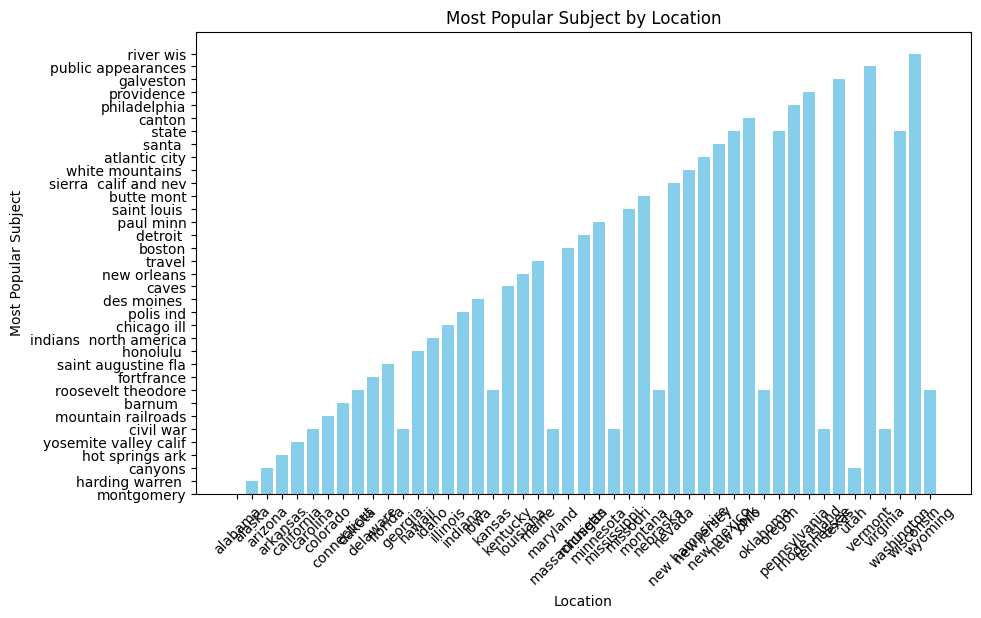

In [38]:
# Get the most popular subject for each location
most_popular_subjects = top_subjects.groupby('location').first().reset_index()

# Plot the most popular subject for each location
plt.figure(figsize=(10, 6))
plt.bar(most_popular_subjects['location'], most_popular_subjects['subject'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Most Popular Subject')
plt.title('Most Popular Subject by Location')
plt.xticks(rotation=45)
plt.show()

In [39]:
top_subjects

,location,subject,count
18,alabama,montgomery,4
3,alabama,birmingham ala,2
5,alabama,carts wagons,2
6,alabama,city town life,2
11,alabama,davis jefferson,2
...,...,...,...
5964,wyoming,roosevelt theodore,19
5971,wyoming,travel,18
5941,wyoming,horseback riding,11
5949,wyoming,mammoth hot springs,7


In [40]:
top_subjects.to_csv('top_subjects_v12.csv', index=False) 

/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/3357913528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df["subject"] = new_filtered_df["subject"].str.strip()
/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_3741/3357913528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_df.dropna(subset=['subject'], inplace=True)


      date            subject  count
0     1843          ostriches      1
12    1850              state      3
1     1850  catholic churches      1
2     1850     chester county      1
3     1850            chinese      1
...    ...                ...    ...
9394  1924     brick industry      1
9408  1929         birmingham      1
9409  1929     birmingham ala      1
9410  1929        smokestacks      1
9411  1929     steel industry      1

[350 rows x 3 columns]
71


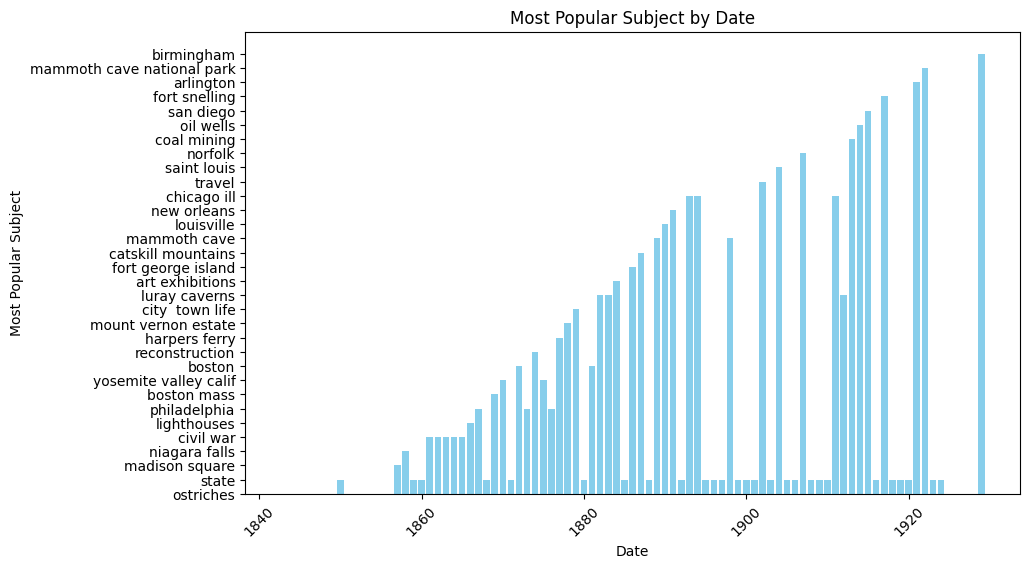

In [41]:
new_filtered_df["subject"] = new_filtered_df["subject"].str.strip()

# Replace empty cells with NaN after all replacements
new_filtered_df.loc[new_filtered_df['subject'] == '', 'subject'] = np.nan

# Drop any rows where 'subject' became empty after replacements
new_filtered_df.dropna(subset=['subject'], inplace=True)

# Group by 'date' and 'subject' and count the occurrences
subject_counts = new_filtered_df.groupby(['date', 'subject']).size().reset_index(name='count')

# Sort the counts in descending order and get the top 5 for each date
top_subjects_year = subject_counts.sort_values(['date', 'count'], ascending=[True, False]).groupby('date').head(5)

print(top_subjects_year)

print(len(top_subjects_year.date.unique()))

# Get the most popular subject for each date
most_popular_subjects = top_subjects_year.groupby('date').first().reset_index()

# Plot the most popular subject for each date
plt.figure(figsize=(10, 6))
plt.bar(most_popular_subjects['date'], most_popular_subjects['subject'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Most Popular Subject')
plt.title('Most Popular Subject by Date')
plt.xticks(rotation=45)
plt.show()